<a href="https://colab.research.google.com/github/robgon-art/MachineRay2/blob/main/MachineRay2_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MachineRay2** - Image Generation
By Robert. A Gonsalves
![MachineRay Output](https://raw.githubusercontent.com/robgon-art/MachineRay2/main/sample%202%20wide.jpg)

This is a project that uses AI to create abstract art.

I gathered images of abstract paintings from WikiArt.org, processed them, and fed them into StyleGAN2 ADA at the size of 1024x1024.
I first trained the GAN using landscape photos for four days.
Next, I trained the GAN for four days using abstract paintings.
I then processed the output images by adjusting the aspect ratio.

This Google Colaboratory allows you to generate unique abstract art automatically.

The source code and generated images are released under the [CC BY-NC-SA license](https://creativecommons.org/licenses/by-nc-sa/4.0/).</br>
![CC BY-NC-SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)

# **Initalize the System**
Hit the Run Cell (play) button to intialize the system.

In [ ]:
# %tensorflow_version 1.x
!git clone https://github.com/NVlabs/stylegan2-ada
!wget -O "network-snapshot-000188.pkl" "https://www.dropbox.com/s/ya3swqh2t165nkn/network-snapshot-000188.pkl?dl=0"
!wget -O painting_info.txt "https://www.dropbox.com/s/h2bktown2oq2avq/painting_info.txt?dl=0"
inited_ISR = False

Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 65, done.
remote: Total 65 (delta 0), reused 0 (delta 0), pack-reused 65
Unpacking objects: 100% (65/65), done.
--2020-12-28 22:53:16--  https://www.dropbox.com/s/ya3swqh2t165nkn/network-snapshot-000188.pkl?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ya3swqh2t165nkn/network-snapshot-000188.pkl [following]
--2020-12-28 22:53:16--  https://www.dropbox.com/s/raw/ya3swqh2t165nkn/network-snapshot-000188.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9770a3668f6c644af460e335ca.dl.dropboxusercontent.com/cd/0/inline/BF_wTWdCi1aZkLqcvI0cn3JEcaOoMGSvWEwKE7oPzyNJ5XG0brMyI9Bix4pFtJx0CBt9v4ymiNiAKIOZvzNACitv4WlGRXUHpPgAMOCIWou8CdLKvz34jFOFybkZwx4SsvI/fil

# **Generate a Sample of Paintings and Show Thumbnails**
Hit the Run Cell button to generate 21 thumbnail images using MachineRay.

Loading networks from "network-snapshot-000188.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 11815 (0/21) ...
Generating image for seed 11816 (1/21) ...
Generating image for seed 11817 (2/21) ...
Generating image for seed 11818 (3/21) ...
Generating image for seed 11819 (4/21) ...
Generating image for seed 11820 (5/21) ...
Generating image for seed 11821 (6/21) ...
Generating image for seed 11822 (7/21) ...
Generating image for seed 11823 (8/21) ...
Generating image for seed 11824 (9/21) ...
Generating image for seed 11825 (10/21) ...
Generating image for seed 11826 (11/21) ...
Generating image for seed 11827 (12/21) ...
Generating image for seed 11828 (13/21) ...
Generating image for seed 11829 (14/21) ...
Generating image for seed 11830 (15/21) ...
Generating image for seed 11831 (16/21) ...
Generating image for seed 11832 (17/21) ...
Generating image for seed 11833 (

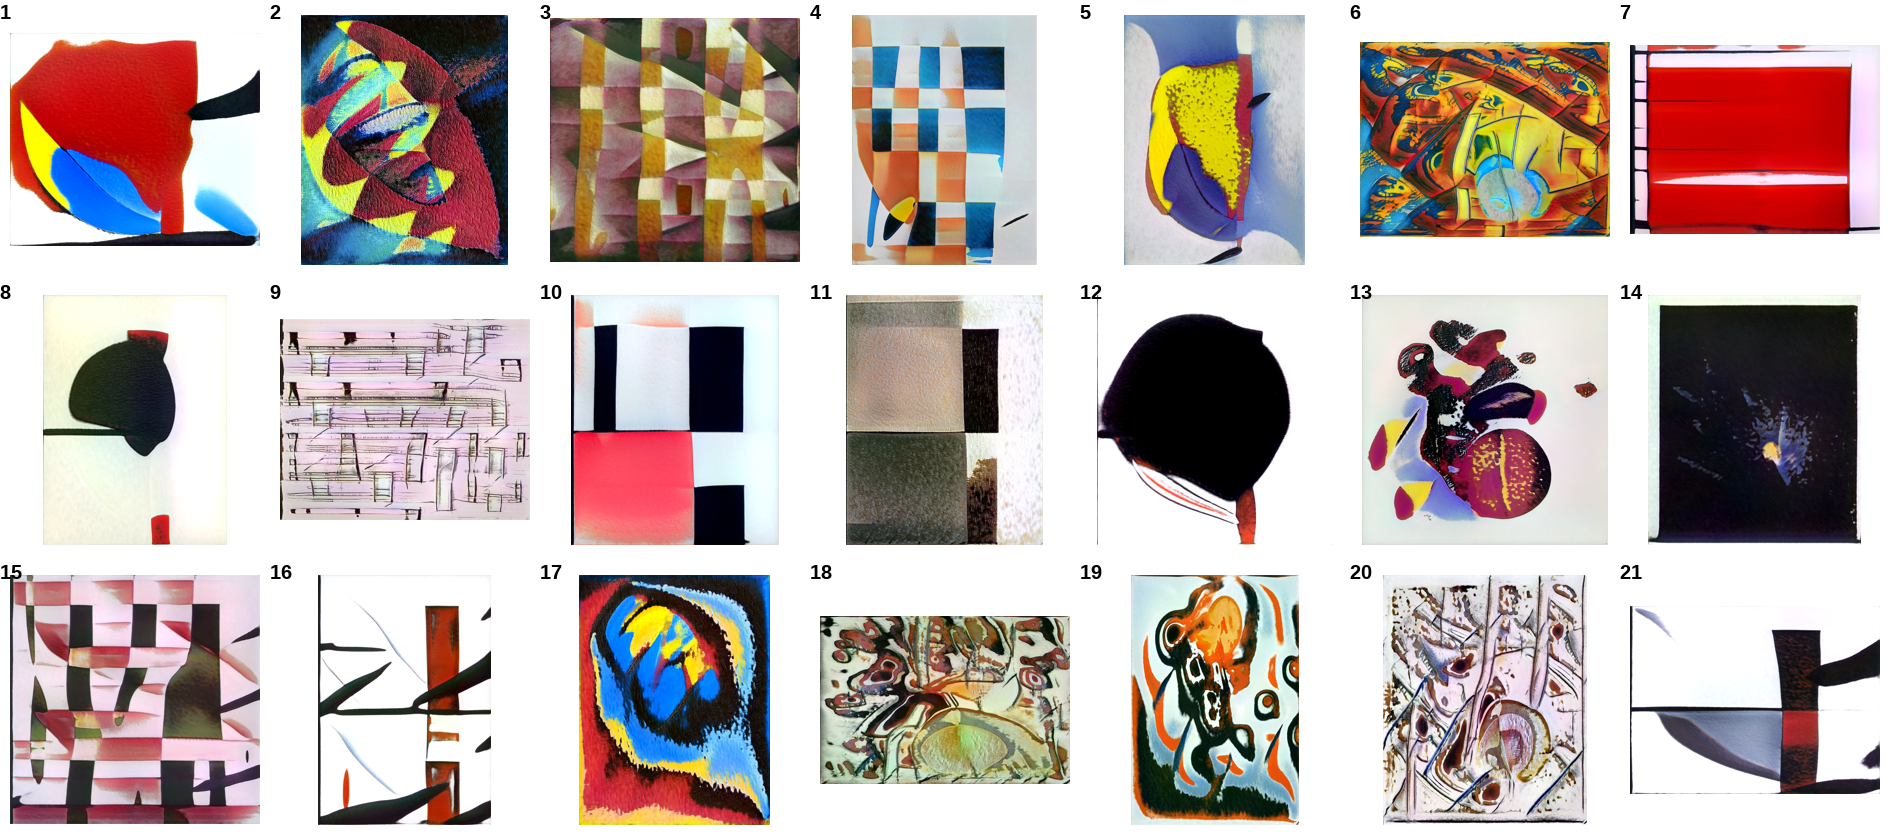

In [ ]:
%tensorflow_version 1.x
import os
from PIL import Image, ImageOps, ImageFont, ImageDraw
import numpy as np
import random

# Clear out the results folder if it exists
if os.path.exists("results"):
  !rm -r results

# Pick a number, any number
seed = random.randint(0,100000)
seed_arg = "--seeds="

for i in range(20):
  seed_arg += str(seed+i) + ","
seed_arg += str(seed+20)

# Generate the images
!python stylegan2-ada/generate.py $seed_arg --trunc=1.4  \
  --outdir results --network=network-snapshot-000188.pkl

# Initialize the x and y arrays
x = np.linspace(0, 849, 850)
y = np.empty(shape=(850))

# Read the file containing the paintings and aspect ratios
info_file = open('painting_info.txt', 'r') 
lines = info_file.readlines()

# Use this font
fnt = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 20)

# Loop through the lines, capturing the aspect ratio in the y array
count = 0
for line in lines: 
  parts = line.split(' ')
  if len(parts) == 2 and len(parts[1]) > 0:
    y[count] = parts[1]
  count += 1

# Sort the values
y = np.sort(y)

# Use piecewise linear interpolation
def get_aspect_ratio():
  input_x = np.random.rand(1)*850
  y_interp = np.interp(input_x, x, y)
  return y_interp[0]

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

# Get all the image file names
image_files = []
for root, dirs, files in os.walk("results"):
    files.sort()
    for file in files:
        if file.endswith(".png"):
             image_files.append(os.path.join(root, file))

# Generate a grid of thumbnails
aspect_ratios = []
size = 250
count = 0
for j in range(0, 3):
  for i in range(0, 7):
    tile = Image.open(image_files[count])
    aspect = get_aspect_ratio()
    aspect_ratios.append(aspect)

    if aspect<1:
      newsize = (int(size * aspect), size)
    else:
      newsize = (size, int(size / aspect))

    tile = tile.resize(newsize)

    delta_w = size - newsize[0] + 20
    delta_h = size - newsize[1] + 30
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    tile = ImageOps.expand(tile, padding, fill = (255, 255, 255))

    draw = ImageDraw.Draw(tile)
    draw.text((0, 0), str(count+1), font=fnt, fill=(0,0,0))

    if i%7 == 0:
      row = tile
    else:
      row = get_concat_h(row, tile)

    count += 1
  
  if j%4 == 0:
    group = row
  else:
    group = get_concat_v(group, row)

# Show the thumbnails
group

# **Choose a Painting**
Choose a thumbnail with the slider and hit the Run Cell button to see the full sized image at 1024 pixels wide or tall.

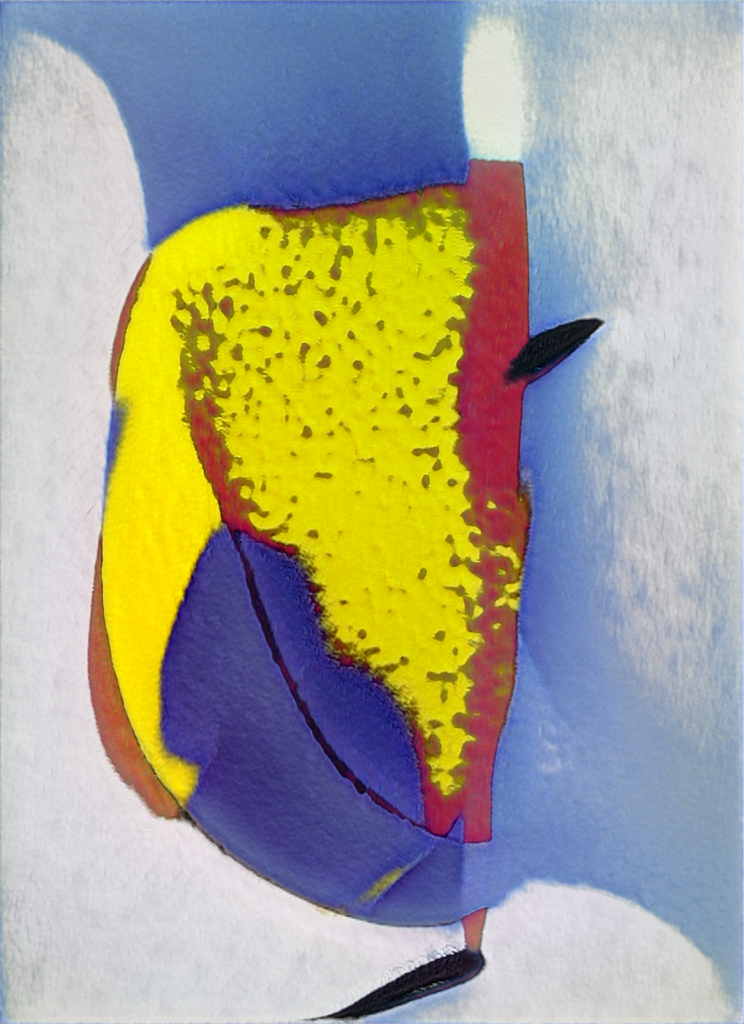

In [ ]:
chosen_thumbnail = 5 #@param {type:"slider", min:1, max:21, step:1}
image = Image.open(image_files[chosen_thumbnail-1])
size = 1024
aspect = aspect_ratios[chosen_thumbnail-1]

if aspect<1:
  newsize = (int(size * aspect), size)
else:
  newsize = (size, int(size / aspect))

resized = image.resize(newsize)
resized